In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import palettable as pltt
import osmnx as ox

from pathlib import Path

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
DATA = Path('data')

In [4]:
wards = gpd.read_file(DATA/'bangalore'/'bangalore'/'GIS'/'bbmpwards'/'bbmpwards.shp')

In [5]:
wards_poly = wards.geometry.unary_union

In [7]:
railsub = ox.graph_from_polygon(wards_poly, infrastructure='way["railway"~"subway"]')

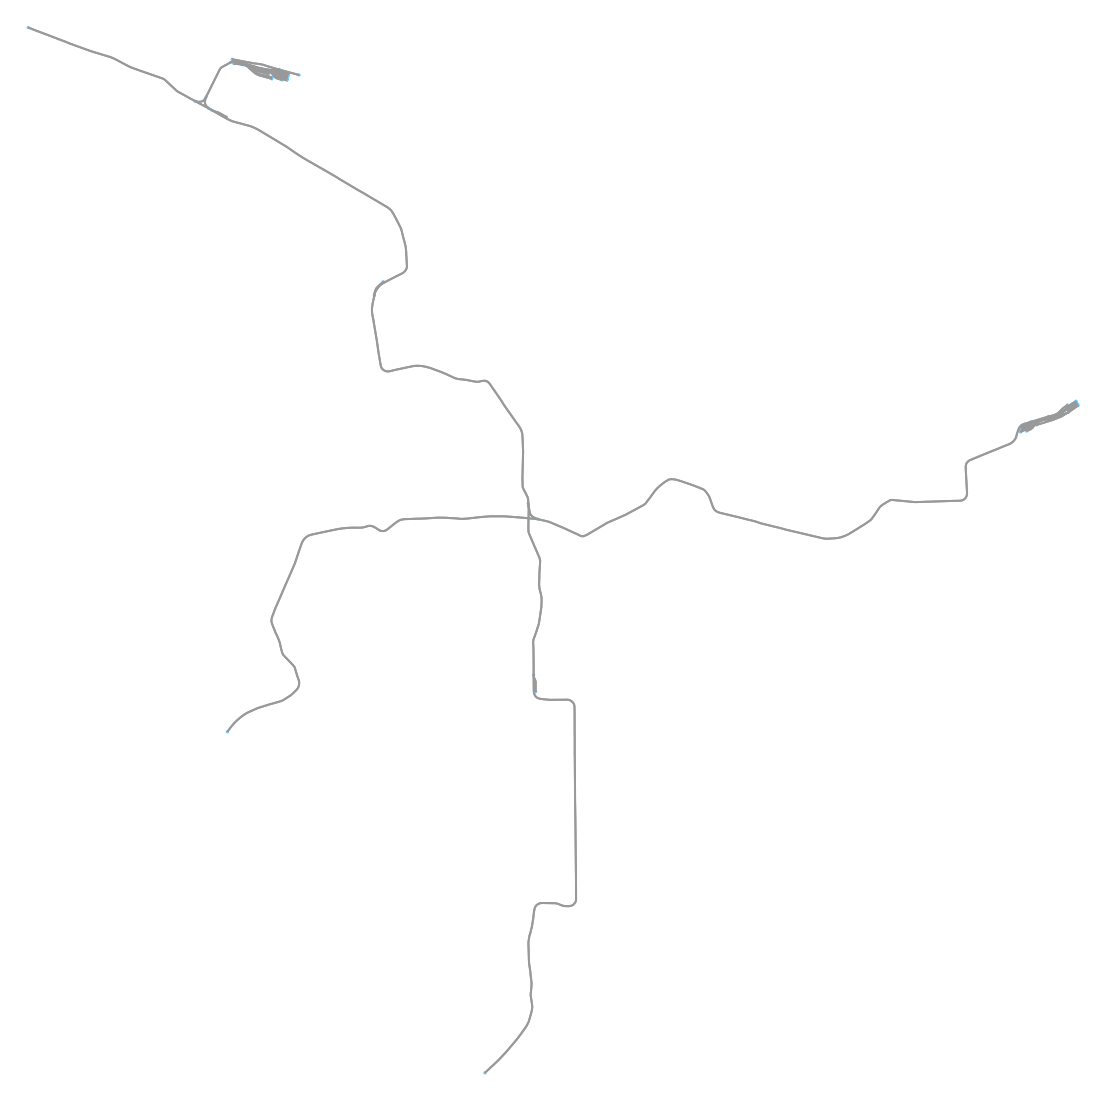

In [8]:
fig, ax = ox.plot_graph(railsub, fig_height=20, node_size=10, edge_linewidth=2)

In [18]:
roads = ox.graph_from_polygon(wards_poly, network_type='drive', simplify=True)

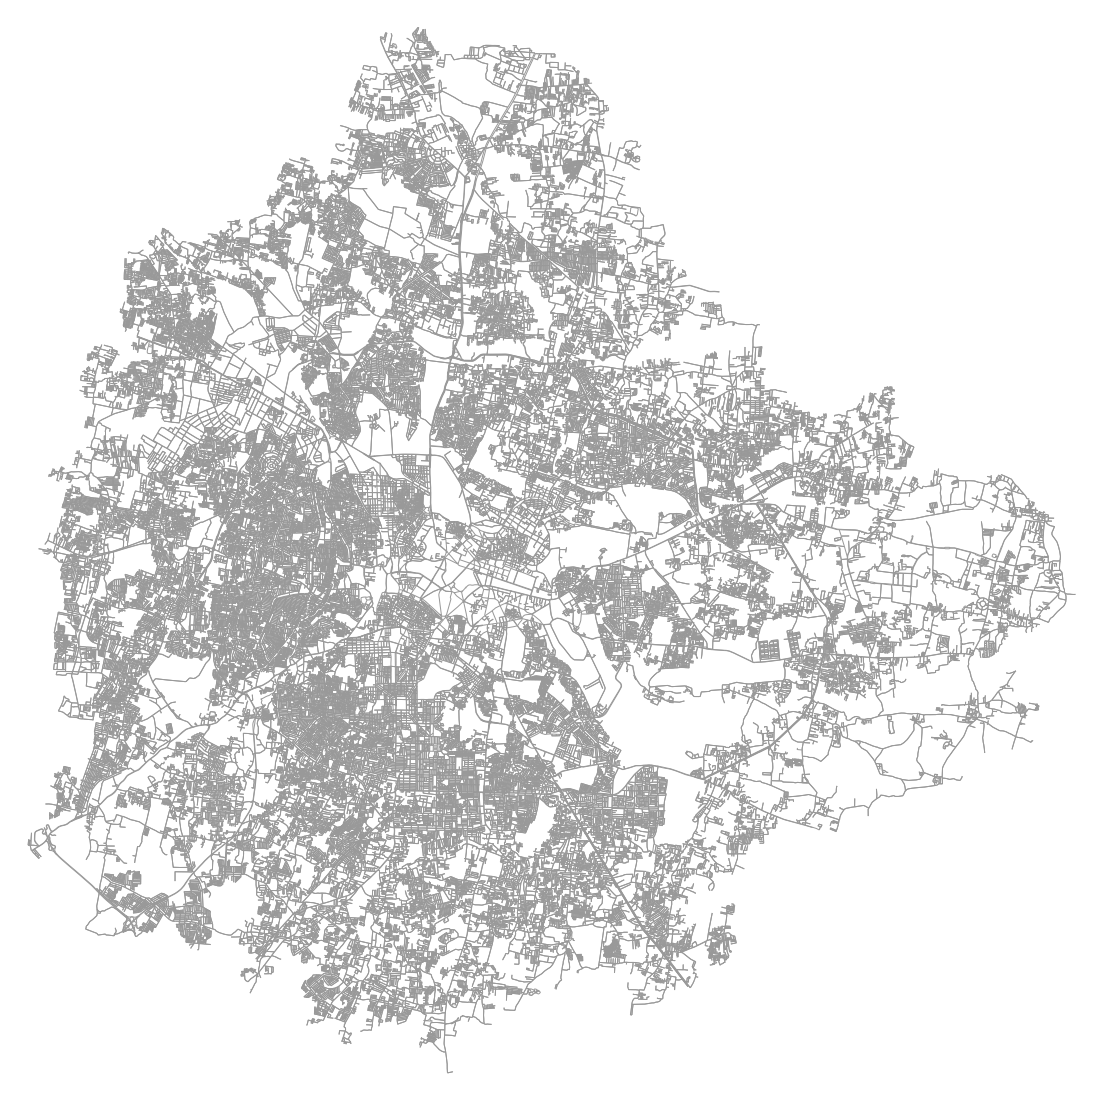

(<Figure size 1480.5x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0245cced50>)

In [23]:
ox.plot_graph(roads, node_size=0, fig_height=20)

In [35]:
ec = ['orange' if data['oneway'] else 'lightgray' for u,v,key,data in roads.edges(keys=True, data=True)]

In [36]:
from collections import Counter
Counter(ec)

Counter({'lightgray': 245270, 'orange': 9750})

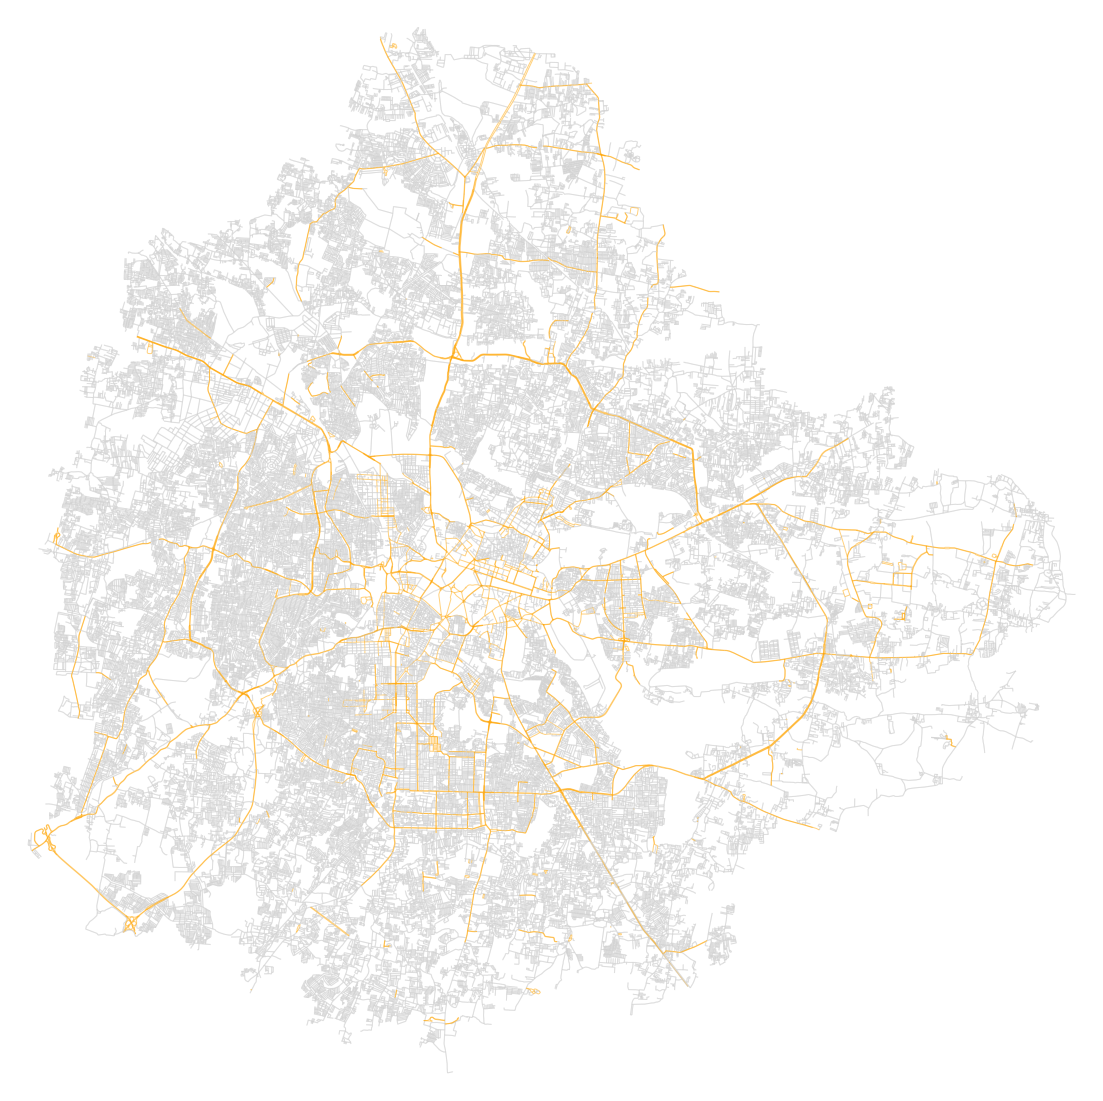

(<Figure size 1480.5x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f027d5e2d50>)

In [37]:
ox.plot_graph(roads, node_size=0, edge_color=ec, edge_alpha=0.5, fig_height=20)

In [51]:
builds = ox.footprints.footprints_from_polygon(wards_poly)

In [52]:
type(builds), builds.shape

(geopandas.geodataframe.GeoDataFrame, (544559, 214))

In [22]:
hospital = builds[builds.amenity == 'hospital']
school = builds[builds.building == 'school']

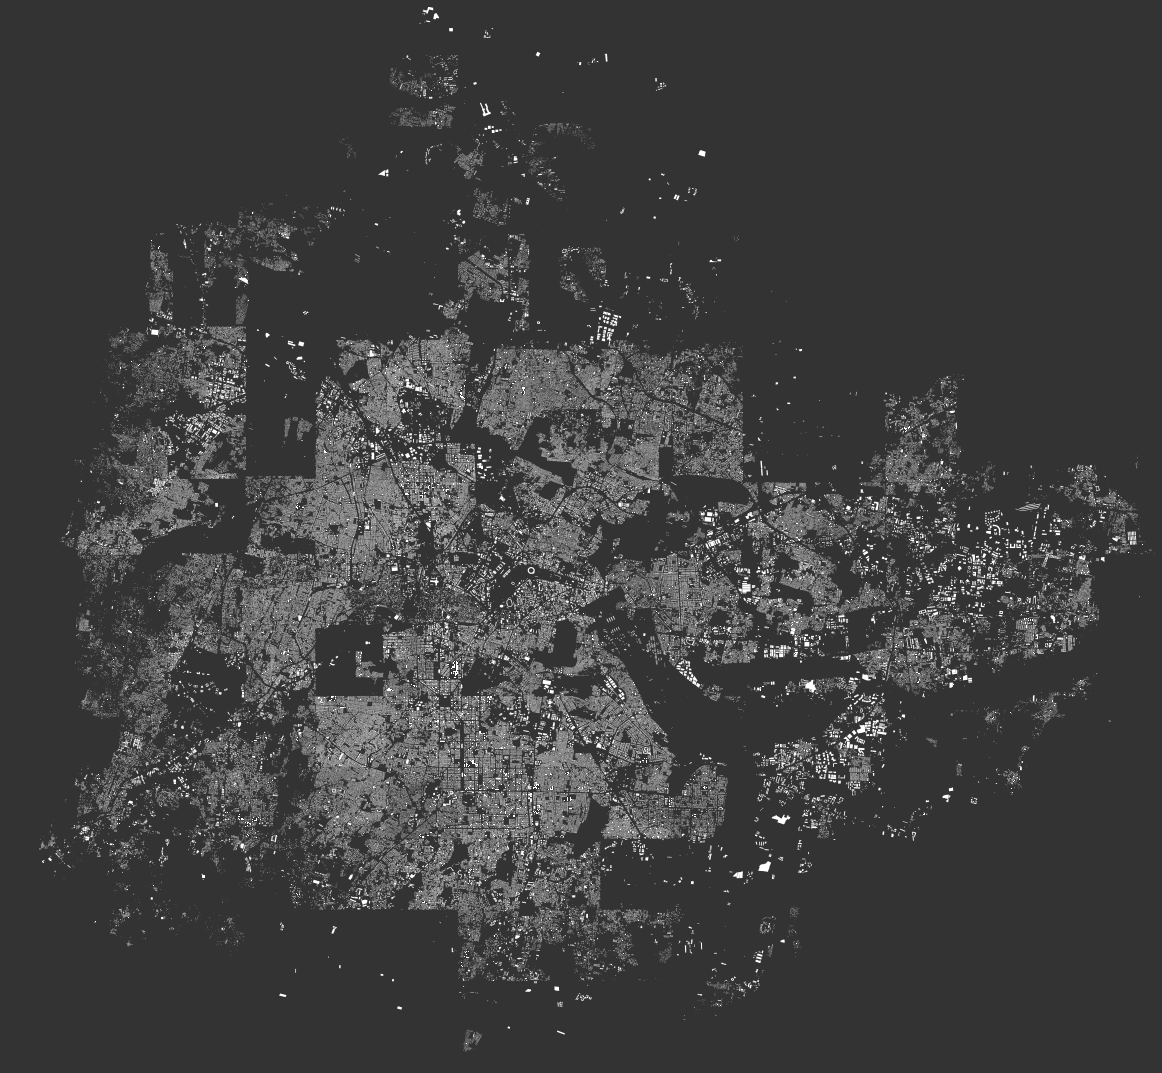

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3bac12f310>)

In [34]:
ox.footprints.plot_footprints(builds, bgcolor='#333333', color='w', figsize=(20, 20),
                              save=False, show=True, close=True, dpi=500)

In [6]:
routes = gpd.read_file(DATA/'bmtc'/'data'/'routes.2018.json')
busstops = gpd.read_file(DATA/'bmtc'/'data'/'busstops.geojson')

In [7]:
routes.head(2)

origin  distance last_departure first_arrival route  \
0  Jayanagara 9th Block      19.6       17:45:00      08:50:00     1   
1    JPNagara 6th Phase      20.8       21:00:00      08:45:00    1E   

                           destination first_departure last_arrival  duration  \
0  Yeshwanathapura new railway station        07:35:00     19:00:00  1.250000   
1       Chowdeshwari Bus Stand JP Park        07:20:00     22:25:00  1.416667   

       speed  trips                                           geometry  
0  15.680000     23  LINESTRING (77.59236 12.91976, 77.59338 12.922...  
1  14.682353      8  LINESTRING (77.57761 12.90649, 77.58563 12.907...

In [8]:
busstops.head(2)

name        lat        lon  \
0  Jayanagara 9th Block,JAYANAGARA 9TH BLOCK,BESI...  12.919757  77.592359   
1  Jayanagara T Block,JAYANAGARA 4TH T BLOCK,BESI...  12.922689  77.593385   

   value                   geometry  
0   0.45  POINT (77.59236 12.91976)  
1   0.45  POINT (77.59338 12.92269)

In [10]:
wards.head(2)

OBJECTID ASS_CONST_ ASS_CONST1  WARD_NO         WARD_NAME    POP_M  \
0         1        150  Yelahanka      2.0  Chowdeswari Ward  10402.0   
1         2        150  Yelahanka      3.0            Atturu  13129.0   

     POP_F  POP_SC  POP_ST  POP_TOTAL  AREA_SQ_KM        LAT        LON  \
0   9224.0  2630.0   286.0    19626.0        7.06  13.121709  77.580422   
1  10891.0  2921.0   665.0    24020.0       10.15  13.102805  77.560038   

        RESERVATIO                                           geometry  
0          General  POLYGON ((77.59229 13.09720, 77.59094 13.09842...  
1  General (Women)  POLYGON ((77.56862 13.12705, 77.57064 13.12654...

In [43]:
subway = ox.graph_from_polygon(wards_poly, infrastructure='way["railway"~"subway"]')

In [44]:
ox.save_graph_shapefile(subway, filename='bng_subway')
subway_edges = gpd.read_file(DATA/'bng_subway'/'edges'/'edges.shp')

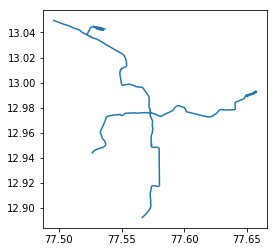

In [46]:
subway_edges.plot()

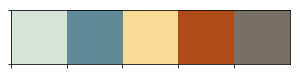

In [18]:
wes = pltt.wesanderson.Darjeeling2_5.hex_colors
sns.palplot(wes)

In [19]:
wes

['#D5E3D8', '#618A98', '#F9DA95', '#AE4B16', '#787064']

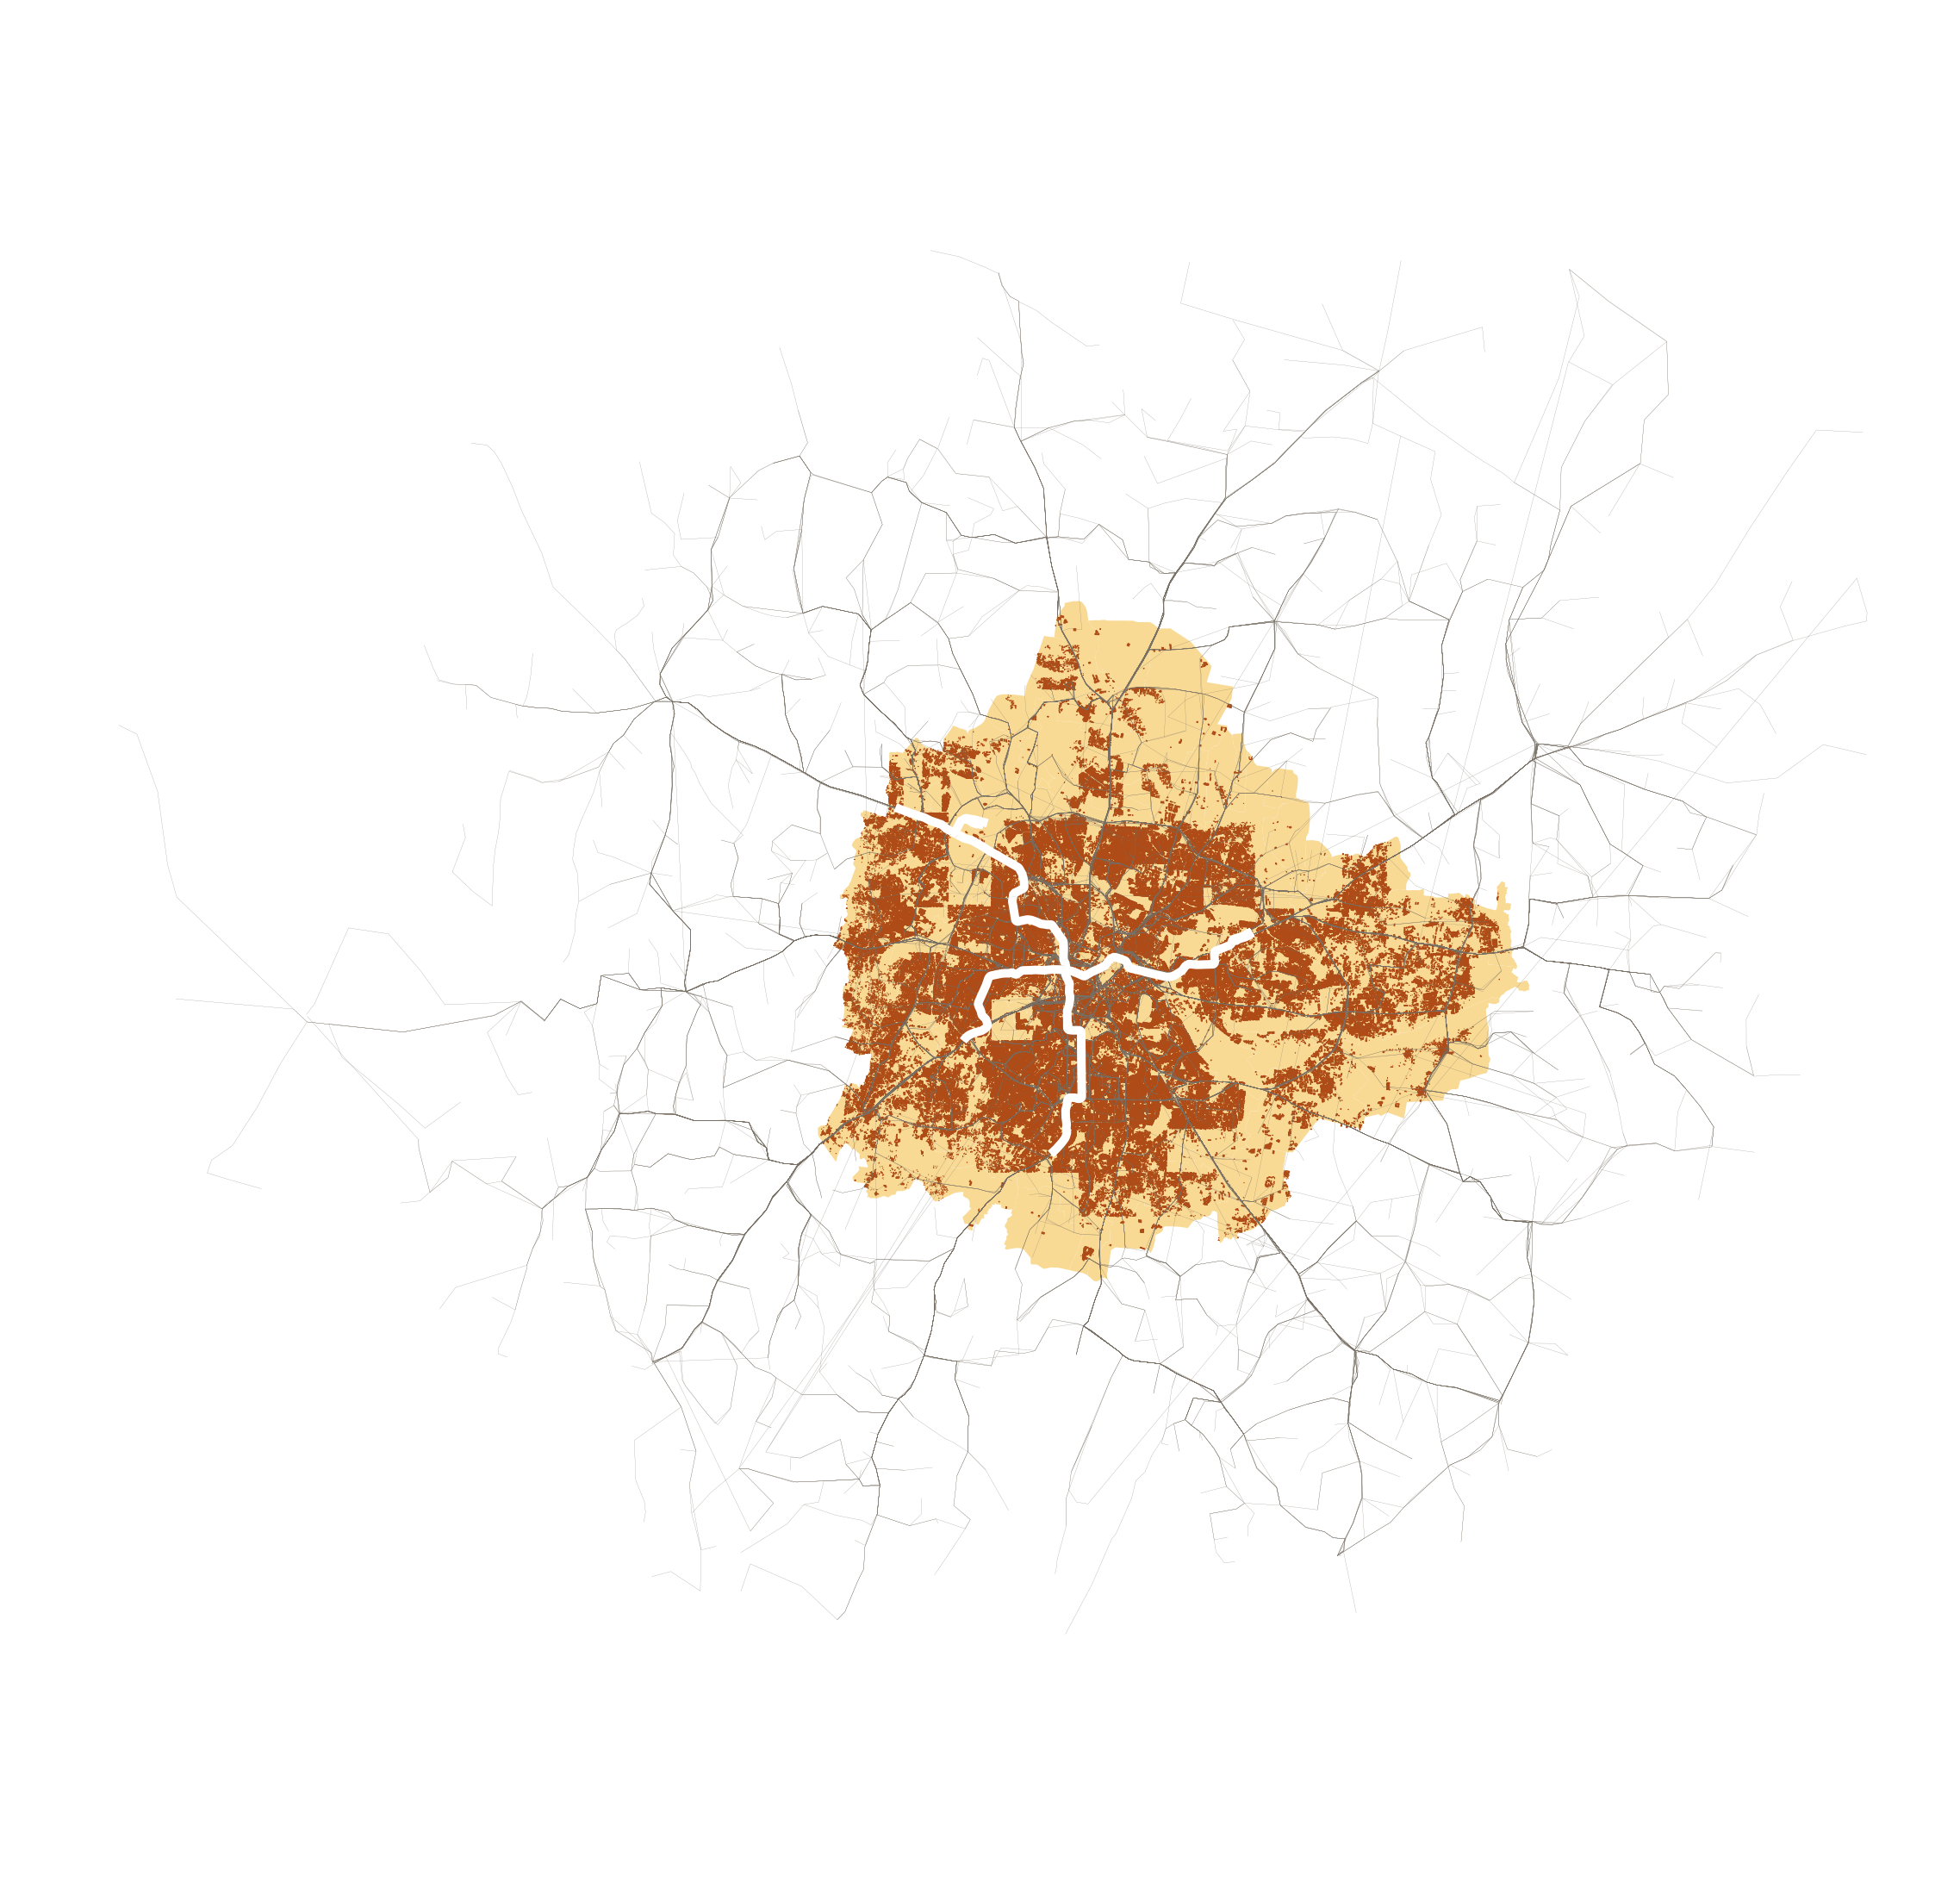

In [53]:
f,ax = plt.subplots(1, figsize=(40,40))
wards.plot(ax=ax, facecolor="#F9DA95", edgecolor="#F9DA95", linewidth=0)
builds.plot(ax=ax, facecolor="#AE4B16", edgecolor="#AE4B16")
routes.plot(ax=ax, color="#787064", linewidth=0.2)
# busstops.plot(ax=ax, color="#AE4B16", markersize=2)
subway_edges.plot(ax=ax, color="white", linewidth=10)
ax.set_axis_off()
plt.axis('equal')
plt.show()